In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
dataset = pd.read_excel('data_td.xlsx')


In [ ]:
dataset.head()

,DS_MARCA,NR_SERIE,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10,CLASSE
0,ALCOLIZER,22000002,2019-04-29,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.001,0.792,-0.239,-0.239,1.671,1.671,1.432,1.432,1.432,1.432,1.909,1.909,0
1,ALCOLIZER,22000007,2019-04-29,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.002,0.410,2.148,2.148,2.864,2.864,3.103,3.103,2.864,2.864,2.148,2.148,1
2,ALCOLIZER,22000008,2019-04-25,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.001,0.397,4.296,3.819,4.057,2.864,3.819,3.819,4.057,3.580,4.296,3.819,1
3,ALCOLIZER,22000027,2019-04-24,Liquido,Inicial,PE,Aprovado,0.0,0.004,0.001,0.405,1.193,1.193,0.716,0.477,1.671,0.955,1.671,1.193,0.716,0.716,1
4,ALCOLIZER,22000034,2019-05-02,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.003,0.529,1.909,3.341,2.148,2.387,2.864,2.864,2.387,2.148,3.341,1.909,1


In [ ]:
df_remove1 = dataset.loc[((dataset['DS_MARCA'] == 'ALCOLIZER'))]

In [ ]:
df_remove2 = dataset.loc[((dataset['DS_MARCA'] == 'DRAGER'))]
df_remove3 = dataset.loc[((dataset['DS_MARCA'] == 'ELEC'))]

In [ ]:
dataset = dataset.drop(df_remove1.index)
dataset = dataset.drop(df_remove2.index)
dataset = dataset.drop(df_remove3.index)

In [ ]:
dataset.head()

,DS_MARCA,NR_SERIE,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10,CLASSE
1115,INTOXIMETERS,034092,2015-09-08,Gasoso,Subsequente,RS,Aprovado,0.0,0.001,0.004,0.836,1.524,1.333,1.143,1.143,0.952,3.048,2.857,0.952,0.571,0.762,1
1116,INTOXIMETERS,037787,2015-12-18,Liquido,Subsequente,GO,Aprovado,0.0,0.002,0.002,0.500,0.239,0.477,0.716,0.955,1.193,1.909,1.432,1.432,1.432,1.193,1
1117,INTOXIMETERS,037793,2019-02-26,Liquido,Subsequente,RS,Aprovado,0.0,0.002,0.002,0.420,-1.671,-1.671,-1.193,-1.193,-1.432,-1.671,-1.671,-1.671,-2.387,-2.387,1
1118,INTOXIMETERS,037794,2015-09-08,Gasoso,Subsequente,RS,Aprovado,0.0,0.000,0.001,0.916,3.619,3.619,3.429,3.429,3.048,1.143,1.143,2.857,2.476,3.238,1
1119,INTOXIMETERS,037798,2018-01-31,Liquido,Subsequente,GO,Aprovado,0.0,0.001,0.002,0.646,-0.239,-0.239,-0.477,-1.193,-1.671,-1.671,-0.955,-2.148,-1.193,-1.193,1


In [ ]:
x = dataset.drop(columns=['NR_SERIE', 'DT_ENSAIO', 'DS_RESULTADO','CLASSE'])
y = dataset.iloc[:,-1].values

In [ ]:
y.shape

(2059,)

In [ ]:
x.head()

,DS_MARCA,DS_METODO,TP_ENSAIO,UF_ENSAIO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10
1115,INTOXIMETERS,Gasoso,Subsequente,RS,0.0,0.001,0.004,0.836,1.524,1.333,1.143,1.143,0.952,3.048,2.857,0.952,0.571,0.762
1116,INTOXIMETERS,Liquido,Subsequente,GO,0.0,0.002,0.002,0.500,0.239,0.477,0.716,0.955,1.193,1.909,1.432,1.432,1.432,1.193
1117,INTOXIMETERS,Liquido,Subsequente,RS,0.0,0.002,0.002,0.420,-1.671,-1.671,-1.193,-1.193,-1.432,-1.671,-1.671,-1.671,-2.387,-2.387
1118,INTOXIMETERS,Gasoso,Subsequente,RS,0.0,0.000,0.001,0.916,3.619,3.619,3.429,3.429,3.048,1.143,1.143,2.857,2.476,3.238
1119,INTOXIMETERS,Liquido,Subsequente,GO,0.0,0.001,0.002,0.646,-0.239,-0.239,-0.477,-1.193,-1.671,-1.671,-0.955,-2.148,-1.193,-1.193


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
print(x_train)

[[ 1.     1.     0.    ... -1.867 -1.867 -2.075]
 [ 1.     0.     1.    ...  0.716  1.193  1.432]
 [ 1.     1.     0.    ...  0.     0.     0.216]
 ...
 [ 1.     0.     1.    ...  0.239  0.    -0.239]
 [ 1.     1.     0.    ... -7.438 -7.438 -7.231]
 [ 1.     1.     0.    ... -2.692 -3.106 -2.692]]


In [ ]:
x_train.shape

(1647, 30)

In [ ]:
y_test.shape

(412,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.         -1.48049332  1.48049332 ... -1.82780965 -1.67808543
  -1.86941965]
 [ 0.         -1.48049332  1.48049332 ...  2.15741964  1.86650865
   1.77642182]
 [ 0.          0.67545053 -0.67545053 ...  0.44523752  0.64927634
   0.39706359]
 ...
 [ 0.          0.67545053 -0.67545053 ...  1.5099378   1.52904969
   1.54050693]
 [ 0.          0.67545053 -0.67545053 ...  0.17766887  0.29651698
   0.21980862]
 [ 0.          0.67545053 -0.67545053 ... -0.53413236 -0.49697908
  -0.66221552]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_res, y_res = rus.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_res.shape

(126,)

1    63
0    63
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


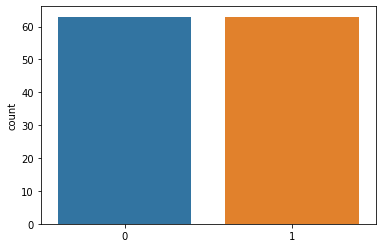

In [ ]:
print(pd.Series(y_res).value_counts())
sns.countplot(y_res);

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_res = LogisticRegression()
model_res.fit(x_res, y_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(x_test)
y_proba_res = model_res.predict_proba(x_test)
 
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))
 
print(accuracy_score(y_test, y_pred_res))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.0588    0.6000    0.1071        15
           1     0.9768    0.6373    0.7713       397

    accuracy                         0.6359       412
   macro avg     0.5178    0.6186    0.4392       412
weighted avg     0.9434    0.6359    0.7472       412

Acurácia: 0.6359

0.6359223300970874


In [ ]:
cm = confusion_matrix(y_test, y_pred_res)
print(cm)

[[  9   6]
 [144 253]]
